# 2-FINDING OPTIMAL TICKET PRICES 

In [1]:
# Import essential library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as st

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
sns.set()

In [2]:
# dataset
dataset = [[50, 7.5, 8.9, 2.0, 0.0], [50, 4.5, 25.3, 8.1, 5.0]]
columns = ['capacity', 'tickets_9_eur', 'tickets_12_eur', 'tickets_15_eur', 'tickets_19_eur']

In [3]:
# dataframe for the analysis
data = pd.DataFrame(data=dataset, index=['Wednesday', 'Friday'], columns=columns)
data

,capacity,tickets_9_eur,tickets_12_eur,tickets_15_eur,tickets_19_eur
Wednesday,50,7.5,8.9,2.0,0.0
Friday,50,4.5,25.3,8.1,5.0


In [4]:
# sell-up function
def sell_up(x):
    return (1/2*((math.exp(1-(x/9)))+(math.exp(3-(x/3)))))

In [5]:
# calculate percentage for willing to pay
percentage_19 = sell_up(19)
percentage_15 = sell_up(15)
percentage_12 = sell_up(12)
percentage_9  = sell_up(9)

print('willing to pay percentage for tickets_9_eur   : ', percentage_9)
print('willing to pay percentage for tickets_12_eur  : ', percentage_12)
print('willing to pay percentage for tickets_13_eur  : ', percentage_15)
print('willing to pay percentage for tickets_19_eur  : ', percentage_19)

willing to pay percentage for tickets_9_eur   :  1.0
willing to pay percentage for tickets_12_eur  :  0.5422053758726157
willing to pay percentage for tickets_13_eur  :  0.32437620113460236
willing to pay percentage for tickets_19_eur  :  0.182433490577579


In [6]:
# generate gauss distribution
def get_truncated_normal(mean=0, sd=1, low=0, upp=1):
    return st.truncnorm((low-mean)/sd, (upp-mean)/sd, loc=mean, scale=sd)

count of total wednesday ticket   :  18.400000000000006

*********************************
1_Expected value for tickets_9_eur  :  18.400000000000006
1_Expected value for tickets_12_eur :  9.976578916056132
1_Expected value for tickets_15_eur :  5.968522100876685
1_Expected value for tickets_19_eur :  3.3567762266274546

*********************************
1_standard deviation for 9_eur  :  7.707463914933372
1_standard deviation for 12_eur :  0.7612562520257538
1_standard deviation for 15_eur :  2.806168888818588
1_standard deviation for 19_eur :  2.373599232774064

*********************************
2_Expected value for tickets_9_eur  :  12.576758580096525
2_Expected value for tickets_12_eur :  9.934501514660107
2_Expected value for tickets_15_eur :  6.101265378059895
2_Expected value for tickets_19_eur :  3.751321971737112

*********************************
2_standard deviation for 9_eur  :  4.266970947799155
2_standard deviation for 12_eur :  0.7569528094404168
2_standard deviation for 

/home/mahmut/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


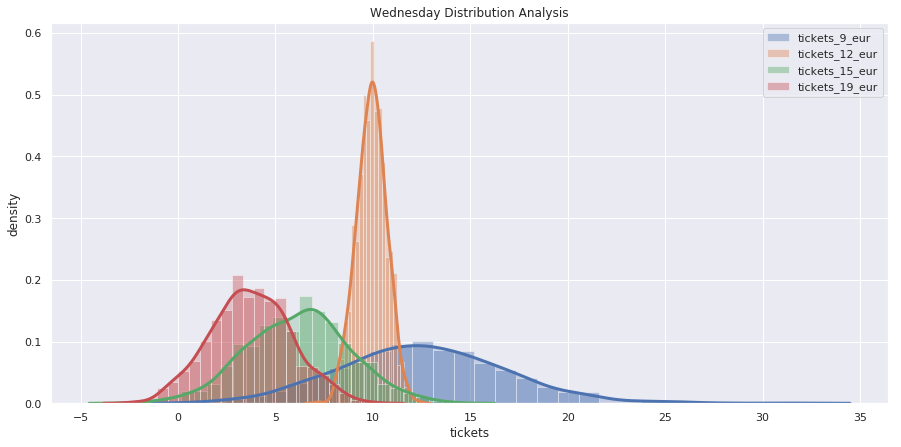

In [7]:
# wednesday analysis

# total ticket
total_wed = (data.loc['Wednesday'].sum(skipna = True) - 50)
print ('count of total wednesday ticket   : ', total_wed)
print('')

# expected value
exp_9  = percentage_9  * total_wed
exp_12 = percentage_12 * total_wed
exp_15 = percentage_15 * total_wed
exp_19 = percentage_19 * total_wed

# standart deviation
std_9  = math.sqrt(pow(abs(exp_9  - data.loc['Wednesday', 'tickets_9_eur']),2)  / 2)
std_12 = math.sqrt(pow(abs(exp_12 - data.loc['Wednesday', 'tickets_12_eur']),2) / 2)
std_15 = math.sqrt(pow(abs(exp_15 - data.loc['Wednesday', 'tickets_15_eur']),2) / 2)
std_19 = math.sqrt(pow(abs(exp_19 - data.loc['Wednesday', 'tickets_19_eur']),2) / 2)

print('*********************************')
print ('1_Expected value for tickets_9_eur  : ', exp_9)
print ('1_Expected value for tickets_12_eur : ', exp_12)
print ('1_Expected value for tickets_15_eur : ', exp_15)
print ('1_Expected value for tickets_19_eur : ', exp_19)
print('')

print('*********************************')
print ('1_standard deviation for 9_eur  : ', std_9)
print ('1_standard deviation for 12_eur : ', std_12)
print ('1_standard deviation for 15_eur : ', std_15)
print ('1_standard deviation for 19_eur : ', std_19)
print('')

# again calculate mean and standard deviation
X = get_truncated_normal(mean=exp_9, sd=std_9, low=0, upp=18.4)
tickets_9_eur_values = X.rvs(1000)

X = get_truncated_normal(mean=exp_12, sd=std_12, low=0, upp=18.4)
tickets_12_eur_values = X.rvs(1000)

X = get_truncated_normal(mean=exp_15, sd=std_15, low=0, upp=18.4)
tickets_15_eur_values = X.rvs(1000)

X = get_truncated_normal(mean=exp_19, sd=std_19, low=0, upp=18.4)
tickets_19_eur_values = X.rvs(1000)

exp_9 = np.mean(tickets_9_eur_values)
exp_12 = np.mean(tickets_12_eur_values)
exp_15 = np.mean(tickets_15_eur_values)
exp_19 = np.mean(tickets_19_eur_values)

std_9 = np.std(tickets_9_eur_values)
std_12 = np.std(tickets_12_eur_values)
std_15 = np.std(tickets_15_eur_values)
std_19 = np.std(tickets_19_eur_values)

print('*********************************')
print ('2_Expected value for tickets_9_eur  : ', exp_9)
print ('2_Expected value for tickets_12_eur : ', exp_12)
print ('2_Expected value for tickets_15_eur : ', exp_15)
print ('2_Expected value for tickets_19_eur : ', exp_19)
print('')

print('*********************************')
print ('2_standard deviation for 9_eur  : ', std_9)
print ('2_standard deviation for 12_eur : ', std_12)
print ('2_standard deviation for 15_eur : ', std_15)
print ('2_standard deviation for 19_eur : ', std_19)
print('')

# calculate confidence interval values
# t_value = st.z.ppf(1-0.025, 1000) #n=1000, @=0.05, two-sided
z_value = st.norm.ppf(.975) #plese check from table
print('*********************************')
print('z-value two-sided: ', z_value)
print('')

#margin of error
moe_9  = z_value * std_9
moe_12 = z_value * std_12
moe_15 = z_value * std_15
moe_19 = z_value * std_19
print('*********************************')
print ('margin of error for tickets_9_eur  : ', moe_9)
print ('margin of error for tickets_12_eur : ', moe_12)
print ('margin of error for tickets_15_eur : ', moe_15)
print ('margin of error for tickets_19_eur : ', moe_19)
print('')

ci_9  = [abs(exp_9-moe_9),   abs(exp_9+moe_9)]
ci_12 = [abs(exp_12-moe_12), abs(exp_12+moe_12)]
ci_15 = [abs(exp_15-moe_15), abs(exp_15+moe_15)]
ci_19 = [abs(exp_19-moe_19), abs(exp_19+moe_19)]
print('*********************************')
print('%95 confidence interval fot tickets_9_eur  : ', ci_9)
print('%95 confidence interval fot tickets_12_eur : ', ci_12)
print('%95 confidence interval fot tickets_15_eur : ', ci_15)
print('%95 confidence interval fot tickets_19_eur : ', ci_19)
print('')

# plot with expected value and standard deviation
mu = [exp_9, exp_12, exp_15, exp_19]
sigma = [std_9, std_12, std_15, std_19]
category = ['tickets_9_eur', 'tickets_12_eur', 'tickets_15_eur', 'tickets_19_eur']

_= plt.figure(figsize=(15,7))

for i in range(0,4,1):
    s = np.random.normal(mu[i], sigma[i], 1000)
    _=sns.distplot(s, hist=True, kde = True, kde_kws = {'shade':True, 'linewidth':3}, label = category[i])

_=plt.xlabel('tickets')
_=plt.ylabel('density')
_=plt.title('Wednesday Distribution Analysis')
_=plt.legend(loc='best')
plt.show();

In [8]:
# calculate max revenue for wednesday
avg_revenue_wed = ((data.loc['Wednesday', 'tickets_9_eur'] * 9) + 
                   (data.loc['Wednesday', 'tickets_12_eur'] * 12) + 
                   (data.loc['Wednesday', 'tickets_15_eur'] * 15) + 
                   (data.loc['Wednesday', 'tickets_19_eur'] * 19))

avg_optimal_price = avg_revenue_wed / total_wed

diff = total_wed - (ci_9[0]+ci_12[0]+ci_15[0]+ci_19[0])

if diff <= ci_19[1]-ci_19[0]:
    ci_19[0] += diff
    diff = total_wed - (ci_9[0]+ci_12[0]+ci_15[0]+ci_19[0])
    
if diff <= (ci_15[1]-ci_15[0]):
    ci_15[0] += diff
    diff = total_wed - (ci_9[0]+ci_12[0]+ci_15[0]+ci_19[0])

if diff <= (ci_12[1]-ci_12[0]):
    ci_12[0] += diff
    diff = total_wed - (ci_9[0]+ci_12[0]+ci_15[0]+ci_19[0])

if diff <= ((ci_9[1]-ci_9[0])):
    ci_9[0] += diff
    diff = total_wed - (ci_9[0]+ci_12[0]+ci_15[0]+ci_19[0])


max_revenue_wed = ((ci_19[0]*19)+(ci_15[0]*15)+(ci_12[0]*12)+(ci_9[0]*9))
number_of_tickets = (ci_19[0]+ci_15[0]+ci_12[0]+ci_9[0])
wednesday_price = max_revenue_wed/number_of_tickets

print ('***************************************************************')
print ('count of total tickets  : ', number_of_tickets)
print ('count of tickets_19_eur : ', ci_19[0])
print ('count of tickets_15_eur : ', ci_15[0])
print ('count of tickets_12_eur : ', ci_12[0])
print ('count of tickets_9_eur  : ', ci_9[0])
print('')

print ('***************************************************************')
print ('Revenue with given average data       : ', avg_revenue_wed)
print ('Optimal price with given average data : ', avg_optimal_price)
print('')

print ('***************************************************************')
print ('Maximum revenue with new values                       : ', max_revenue_wed)
print ('Optimal ticket price for maximum revenue in wednesday : ', wednesday_price)

***************************************************************
count of total tickets  :  18.400000000000006
count of tickets_19_eur :  4.800641360321538
count of tickets_15_eur :  0.9348081701865443
count of tickets_12_eur :  8.45090127016048
count of tickets_9_eur  :  4.213649199331442

***************************************************************
Revenue with given average data       :  204.3
Optimal price with given average data :  11.103260869565215

***************************************************************
Maximum revenue with new values                       :  244.56796643481613
Optimal ticket price for maximum revenue in wednesday :  13.291737306240003


count of total friday ticket   :  42.89999999999999

*********************************
1_Expected value for tickets_9_eur  :  42.89999999999999
1_Expected value for tickets_12_eur :  23.26061062493521
1_Expected value for tickets_15_eur :  13.91573902867444
1_Expected value for tickets_19_eur :  7.826396745778137

*********************************
1_standard deviation for 9_eur  :  27.152900397563418
1_standard deviation for 12_eur :  1.442066056588108
1_standard deviation for 15_eur :  4.1123485047869615
1_standard deviation for 19_eur :  1.998564305263311

*********************************
2_Expected value for tickets_9_eur  :  25.730887860480216
2_Expected value for tickets_12_eur :  23.29825781563681
2_Expected value for tickets_15_eur :  14.05531874409378
2_Expected value for tickets_19_eur :  7.833413636120394

*********************************
2_standard deviation for 9_eur  :  11.54783362867855
2_standard deviation for 12_eur :  1.4195488280121176
2_standard deviation for 15_eu

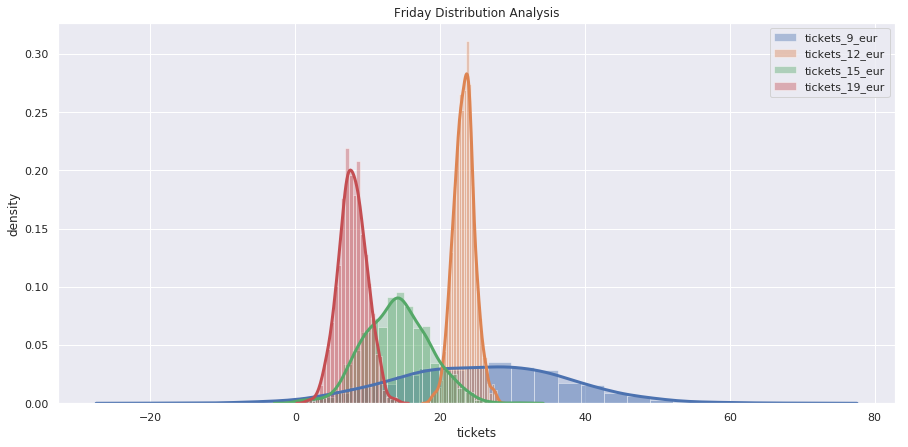

In [9]:
# friday analysis

# total ticket
total_frd = (data.loc['Friday'].sum(skipna = True) - 50)
print ('count of total friday ticket   : ', total_frd)
print('')

# expected value
exp_9  = percentage_9  * total_frd
exp_12 = percentage_12 * total_frd
exp_15 = percentage_15 * total_frd
exp_19 = percentage_19 * total_frd

# standart deviation
std_9  = math.sqrt(pow(abs(exp_9  - data.loc['Friday', 'tickets_9_eur']),2)  / 2)
std_12 = math.sqrt(pow(abs(exp_12 - data.loc['Friday', 'tickets_12_eur']),2) / 2)
std_15 = math.sqrt(pow(abs(exp_15 - data.loc['Friday', 'tickets_15_eur']),2) / 2)
std_19 = math.sqrt(pow(abs(exp_19 - data.loc['Friday', 'tickets_19_eur']),2) / 2)

print('*********************************')
print ('1_Expected value for tickets_9_eur  : ', exp_9)
print ('1_Expected value for tickets_12_eur : ', exp_12)
print ('1_Expected value for tickets_15_eur : ', exp_15)
print ('1_Expected value for tickets_19_eur : ', exp_19)
print('')


print('*********************************')
print ('1_standard deviation for 9_eur  : ', std_9)
print ('1_standard deviation for 12_eur : ', std_12)
print ('1_standard deviation for 15_eur : ', std_15)
print ('1_standard deviation for 19_eur : ', std_19)
print('')

# again calculate mean and standard deviation
X = get_truncated_normal(mean=exp_9, sd=std_9, low=0, upp=43)
tickets_9_eur_values = X.rvs(1000)

X = get_truncated_normal(mean=exp_12, sd=std_12, low=0, upp=43)
tickets_12_eur_values = X.rvs(1000)

X = get_truncated_normal(mean=exp_15, sd=std_15, low=0, upp=43)
tickets_15_eur_values = X.rvs(1000)

X = get_truncated_normal(mean=exp_19, sd=std_19, low=0, upp=43)
tickets_19_eur_values = X.rvs(1000)

exp_9 = np.mean(tickets_9_eur_values)
exp_12 = np.mean(tickets_12_eur_values)
exp_15 = np.mean(tickets_15_eur_values)
exp_19 = np.mean(tickets_19_eur_values)

std_9 = np.std(tickets_9_eur_values)
std_12 = np.std(tickets_12_eur_values)
std_15 = np.std(tickets_15_eur_values)
std_19 = np.std(tickets_19_eur_values)

print('*********************************')
print ('2_Expected value for tickets_9_eur  : ', exp_9)
print ('2_Expected value for tickets_12_eur : ', exp_12)
print ('2_Expected value for tickets_15_eur : ', exp_15)
print ('2_Expected value for tickets_19_eur : ', exp_19)
print('')

print('*********************************')
print ('2_standard deviation for 9_eur  : ', std_9)
print ('2_standard deviation for 12_eur : ', std_12)
print ('2_standard deviation for 15_eur : ', std_15)
print ('2_standard deviation for 19_eur : ', std_19)
print('')

# calculate confidence interval values
# t_value = st.z.ppf(1-0.025, 1000) #n=1000, @=0.05, two-sided
z_value = st.norm.ppf(.975)
print('*********************************')
print('z-value two-sided: ', z_value)
print('')

#margin of error
moe_9  = z_value * std_9
moe_12 = z_value * std_12
moe_15 = z_value * std_15
moe_19 = z_value * std_19
print('*********************************')
print ('margin of error for tickets_9_eur  : ', moe_9)
print ('margin of error for tickets_12_eur : ', moe_12)
print ('margin of error for tickets_15_eur : ', moe_15)
print ('margin of error for tickets_19_eur : ', moe_19)
print('')


ci_9  = [exp_9-moe_9,   exp_9+moe_9]
ci_12 = [exp_12-moe_12, exp_12+moe_12]
ci_15 = [exp_15-moe_15, exp_15+moe_15]
ci_19 = [exp_19-moe_19, exp_19+moe_19]
print('*********************************')
print('%95 confidence interval fot tickets_9_eur  : ', ci_9)
print('%95 confidence interval fot tickets_12_eur : ', ci_12)
print('%95 confidence interval fot tickets_15_eur : ', ci_15)
print('%95 confidence interval fot tickets_19_eur : ', ci_19)
print('')

# plot with expected value and standard deviation
mu = [exp_9, exp_12, exp_15, exp_19]
sigma = [std_9, std_12, std_15, std_19]
category = ['tickets_9_eur', 'tickets_12_eur', 'tickets_15_eur', 'tickets_19_eur']

_= plt.figure(figsize=(15,7))

for i in range(0,4,1):
    s = np.random.normal(mu[i], sigma[i], 1000)
    _=sns.distplot(s, hist=True, kde = True, kde_kws = {'shade':True, 'linewidth':3}, label = category[i])

_=plt.xlabel('tickets')
_=plt.ylabel('density')
_=plt.title('Friday Distribution Analysis')
_=plt.legend(loc='best')
plt.show();

In [10]:
# calculate max revenue for friday
avg_revenue_frd = ((data.loc['Friday', 'tickets_9_eur'] * 9) + 
                   (data.loc['Friday', 'tickets_12_eur'] * 12) + 
                   (data.loc['Friday', 'tickets_15_eur'] * 15) + 
                   (data.loc['Friday', 'tickets_19_eur'] * 19))

avg_optimal_price = avg_revenue_frd / total_frd

diff = total_frd - (ci_9[0]+ci_12[0]+ci_15[0]+ci_19[0])

if diff <= ci_19[1]-ci_19[0]:
    ci_19[0] += diff
    diff = total_frd - (ci_9[0]+ci_12[0]+ci_15[0]+ci_19[0])
    
if diff <= (ci_15[1]-ci_15[0]):
    ci_15[0] += diff
    diff = total_frd - (ci_9[0]+ci_12[0]+ci_15[0]+ci_19[0])

if diff <= (ci_12[1]-ci_12[0]):
    ci_12[0] += diff
    diff = total_frd - (ci_9[0]+ci_12[0]+ci_15[0]+ci_19[0])

if diff <= ((ci_9[1]-ci_9[0])):
    ci_9[0] += diff
    diff = total_frd - (ci_9[0]+ci_12[0]+ci_15[0]+ci_19[0])

max_revenue_frd = ((ci_19[0]*19)+(ci_15[0]*15)+(ci_12[0]*12)+(ci_9[0]*9))
number_of_tickets = (ci_19[0]+ci_15[0]+ci_12[0]+ci_9[0])
friday_price = max_revenue_frd/number_of_tickets

print ('***************************************************************')
print ('count of total tickets  : ', number_of_tickets)
print ('count of tickets_19_eur : ', ci_19[0])
print ('count of tickets_15_eur : ', ci_15[0])
print ('count of tickets_12_eur : ', ci_12[0])
print ('count of tickets_9_eur  : ', ci_9[0])
print('')

print ('***************************************************************')
print ('Revenue with given average data       : ', avg_revenue_frd)
print ('Optimal price with given average data : ', avg_optimal_price)
print('')

print ('***************************************************************')
print ('Maximum revenue with new values                    : ', max_revenue_frd)
print ('Optimal ticket price for maximum revenue in friday : ', friday_price)

***************************************************************
count of total tickets  :  42.89999999999999
count of tickets_19_eur :  4.017885759968507
count of tickets_15_eur :  15.268571152784698
count of tickets_12_eur :  20.515993238437016
count of tickets_9_eur  :  3.0975498488097735

***************************************************************
Revenue with given average data       :  560.6
Optimal price with given average data :  13.06759906759907

***************************************************************
Maximum revenue with new values                    :  579.4382642317044
Optimal ticket price for maximum revenue in friday :  13.506719445960478


# OPTIMAL PRICE FOR WEDNESDAY : 13.29 €
# OPTIMAL PRICE FOR FRIDAY           : 13.51 €